In [1]:
# Import required packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import itertools

In [2]:
# Path of required files
filepath = r"C:\Users\Arpita\Desktop\AnalytixLabs_new\Case Studies\Python Case Studies\Python Foundation End to End Case Study E-Commerce Analytics Project"
filepath.replace("\\","/")

'C:/Users/Arpita/Desktop/AnalytixLabs_new/Case Studies/Python Case Studies/Python Foundation End to End Case Study E-Commerce Analytics Project'

In [3]:
# Importing the files
cust = pd.read_csv(filepath + "/CUSTOMERS.csv")
geo = pd.read_csv(filepath + "/GEO_LOCATION.csv")
ord_itm = pd.read_csv(filepath + "/ORDER_ITEMS.csv")
ord_pay = pd.read_csv(filepath + "/ORDER_PAYMENTS.csv")
ord_rev = pd.read_csv(filepath + "/ORDER_REVIEW_RATINGS.csv")
ords = pd.read_csv(filepath + "/ORDERS.csv")
prods = pd.read_csv(filepath + "/PRODUCTS.csv")
sellers = pd.read_csv(filepath + "/SELLERS.csv")

In [4]:
# Metadata of each dataset
for i in [cust,geo,ord_itm,ord_pay,ord_rev,ords,prods,sellers]:
    print(i.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 

In [5]:
# Merging the datasets with common columns
d1 = pd.merge(left = ord_itm, right = prods, how = "inner", left_on="product_id", right_on="product_id").merge(sellers,\
                              how="inner", left_on= "seller_id", right_on="seller_id")

In [6]:
# Forming the final dataset to work on
ecomm = pd.merge(left = cust, right = geo, how ="left", left_on = "customer_zip_code_prefix", right_on = "geolocation_zip_code_prefix")\
        .merge(ords, how ="inner", left_on = "customer_id", right_on = "customer_id").merge(ord_pay, how="inner", left_on= "order_id", \
        right_on="order_id").merge(ord_rev, how ="inner", left_on="order_id", right_on="order_id").merge(d1, \
        how="inner", left_on= "order_id", right_on="order_id")

In [7]:
# Data inspection
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    118315 non-null  object 
 1   customer_unique_id             118315 non-null  object 
 2   customer_zip_code_prefix       118315 non-null  int64  
 3   customer_city                  118315 non-null  object 
 4   customer_state                 118315 non-null  object 
 5   geolocation_zip_code_prefix    117998 non-null  float64
 6   geolocation_lat                117998 non-null  float64
 7   geolocation_lng                117998 non-null  float64
 8   geolocation_city               117998 non-null  object 
 9   geolocation_state              117998 non-null  object 
 10  order_id                       118315 non-null  object 
 11  order_status                   118315 non-null  object 
 12  order_purchase_timestamp      

In [8]:
# Converting datetime variables to datetime format
for dt in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',\
           'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']:
    ecomm[dt] = pd.to_datetime(ecomm[dt], format = "%m/%d/%Y %H:%M")

In [9]:
# Number of missings in each variable
for col in ecomm.columns:
    print(col, "|", "No. of missings: ", ecomm[col].isna().sum())

customer_id | No. of missings:  0
customer_unique_id | No. of missings:  0
customer_zip_code_prefix | No. of missings:  0
customer_city | No. of missings:  0
customer_state | No. of missings:  0
geolocation_zip_code_prefix | No. of missings:  317
geolocation_lat | No. of missings:  317
geolocation_lng | No. of missings:  317
geolocation_city | No. of missings:  317
geolocation_state | No. of missings:  317
order_id | No. of missings:  0
order_status | No. of missings:  0
order_purchase_timestamp | No. of missings:  0
order_approved_at | No. of missings:  15
order_delivered_carrier_date | No. of missings:  1254
order_delivered_customer_date | No. of missings:  2588
order_estimated_delivery_date | No. of missings:  0
payment_sequential | No. of missings:  0
payment_type | No. of missings:  0
payment_installments | No. of missings:  0
payment_value | No. of missings:  0
review_id | No. of missings:  0
review_score | No. of missings:  0
review_creation_date | No. of missings:  0
review_ans

In [10]:
# Missing value imputation
for col in ecomm.columns:
    if ecomm[col].dtype in (['int64','float64']):
        ecomm[col] = ecomm[col].fillna(ecomm[col].mean())
    elif ecomm[col].dtype == object:
        ecomm[col] = ecomm[col].fillna(ecomm[col].mode()[0])
    elif ecomm[col].dtype == 'datetime64[ns]':
        ecomm[col] = ecomm[col].fillna(ecomm[col].median())

In [11]:
# Check of duplicate records
ecomm[ecomm.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state


### Define and calculate high level metrics

In [12]:
# Total amount earned in the time frame
tot_revenue = ecomm.payment_value.sum()
# Total quantity sold 
tot_qty = ecomm.order_item_id.sum()
# Total no. of unique products on the list
tot_prod = ecomm.product_id.nunique()
# Total no. of unique product categories
tot_categ = ecomm.product_category_name.nunique()
# Total no. of distinct sellers
tot_sellers = ecomm.seller_id.nunique()
# Total no. of distinct locations 
tot_loc = ecomm.geolocation_zip_code_prefix.nunique()
# Distinct no. of payment methods used
tot_channels = ecomm.payment_type.nunique()
# No. of cities served
tot_city = ecomm.geolocation_city.nunique()
# No. of unique customers
tot_cust = ecomm.customer_id.nunique()
# No. of orders placed
tot_orders = ecomm.order_id.count()
# Total reviews received
tot_rev = ecomm.review_id.nunique()
# Average score got 
avg_score = ecomm.review_score.mean()

print("Revenue generated:", "$", round(tot_revenue,2), "\nQuantity sold: ", tot_qty, "\nProducts: ", tot_prod, "\nProd. Category: ", tot_categ,"\nSellers: ",tot_sellers,\
     "\nLocations: ", tot_loc, "\nCities: ", tot_city, "\nPayment Methods: ", tot_channels, "\nCustomers: ", tot_cust, "\nOrders: ", tot_orders, "\nReviews: ", tot_rev,\
     "\nAverage Rating: ", round(avg_score,2))

Revenue generated: $ 20418288.15 
Quantity sold:  141565 
Products:  32951 
Prod. Category:  71 
Sellers:  3095 
Locations:  14821 
Cities:  3789 
Payment Methods:  4 
Customers:  98665 
Orders:  118315 
Reviews:  98452 
Average Rating:  4.01


In [13]:
# Count of orders by status
ords.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [14]:
# Saving combinations of different months and years in a variable
mon_yr = ecomm.order_purchase_timestamp.dt.strftime("%b-%y")
sort_order = ['Sep-16','Oct-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17',\
            'Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18','Apr-18','May-18', 'Jun-18','Jul-18','Aug-18','Sep-18']
mon_yr = pd.CategoricalIndex(mon_yr, categories = sort_order, ordered = True)

In [15]:
# Creating variables Month and Year in the combined data and day, hour as separate variables
ecomm['Month'] =  ecomm.order_purchase_timestamp.dt.strftime("%b")
ecomm['Year'] =  ecomm.order_purchase_timestamp.dt.strftime("%Y")
day = ecomm.order_purchase_timestamp.dt.strftime("%d")
hour = ecomm.order_purchase_timestamp.dt.strftime("%H")

### Number of new customers acquired every month

In [16]:
# Minimum order date of customers by each month
fpd = ecomm.groupby(['customer_id', 'Year', 'Month']).agg({'order_purchase_timestamp': 'min'}).\
            rename(columns={'order_purchase_timestamp':'Purchase_date'}).reset_index()

In [17]:
# Minimum order date by customers
# Merging both the datasets to compare order dates
fpd_o = fpd.merge(ecomm.groupby(['customer_id']).order_purchase_timestamp.min().reset_index(), how = "inner", \
       left_on="customer_id", right_on="customer_id")

In [18]:
# If both dates are same, then assigning him/her as a new customer
fpd_o['Flag'] = np.where(fpd_o['Purchase_date'] == fpd_o['order_purchase_timestamp'], "New Cust", "Old Cust")
fpd_o

,customer_id,Year,Month,Purchase_date,order_purchase_timestamp,Flag
0,00012a2ce6f8dcda20d059ce98491703,2017,Nov,2017-11-14 16:08:00,2017-11-14 16:08:00,New Cust
1,000161a058600d5901f007fab4c27140,2017,Jul,2017-07-16 09:40:00,2017-07-16 09:40:00,New Cust
2,0001fd6190edaaf884bcaf3d49edf079,2017,Feb,2017-02-28 11:06:00,2017-02-28 11:06:00,New Cust
3,0002414f95344307404f0ace7a26f1d5,2017,Aug,2017-08-16 13:09:00,2017-08-16 13:09:00,New Cust
4,000379cdec625522490c315e70c7a9fb,2018,Apr,2018-04-02 13:42:00,2018-04-02 13:42:00,New Cust
...,...,...,...,...,...,...
98660,fffcb937e9dd47a13f05ecb8290f4d3e,2018,Mar,2018-03-17 00:55:00,2018-03-17 00:55:00,New Cust
98661,fffecc9f79fd8c764f843e9951b11341,2018,Mar,2018-03-29 16:59:00,2018-03-29 16:59:00,New Cust
98662,fffeda5b6d849fbd39689bb92087f431,2018,May,2018-05-22 13:36:00,2018-05-22 13:36:00,New Cust
98663,ffff42319e9b2d713724ae527742af25,2018,Jun,2018-06-13 16:57:00,2018-06-13 16:57:00,New Cust


In [19]:
# Count of new and old customers
fpd_o.Flag.value_counts()

New Cust    98665
Name: Flag, dtype: int64

In [20]:
# How many new customers are acquired every month
fpd_o.loc[fpd_o['Flag'] == "New Cust", ['Flag','Year','Month']].groupby(['Year','Month']).count()

Flag
Year Month      
2016 Dec       1
     Oct     308
     Sep       2
2017 Apr    2391
     Aug    4293
     Dec    5624
     Feb    1733
     Jan     789
     Jul    3969
     Jun    3217
     Mar    2641
     May    3660
     Nov    7451
     Oct    4568
     Sep    4243
2018 Apr    6934
     Aug    6452
     Feb    6694
     Jan    7220
     Jul    6273
     Jun    6160
     Mar    7188
     May    6853
     Sep       1

### Understanding the retention of customers on MoM basis

In [21]:
# Retention rate on month on month basis
# Subtracting no.of new customers from no.of total customers to get the retention number in each month
ecomm.groupby(['Year','Month']).customer_id.nunique() - fpd_o.loc[fpd_o['Flag'] == "New Cust", ['Flag','Year','Month']]\
                                                        .groupby(['Year','Month']).count().Flag

Year  Month
2016  Dec      0
      Oct      0
      Sep      0
2017  Apr      0
      Aug      0
      Dec      0
      Feb      0
      Jan      0
      Jul      0
      Jun      0
      Mar      0
      May      0
      Nov      0
      Oct      0
      Sep      0
2018  Apr      0
      Aug      0
      Feb      0
      Jan      0
      Jul      0
      Jun      0
      Mar      0
      May      0
      Sep      0
dtype: int64

### Revenue from customers on MoM basis

In [22]:
# Revenue from new/existing customers on month on month basis 
pd.pivot_table(ecomm, index=['customer_id'],columns = ['Year','Month'],values=['payment_value'],\
                      aggfunc=np.sum, margins=True,  margins_name= "Total", fill_value = "-")

payment_value                              \
Year                                      2016                        2017   
Month                                      Dec       Oct     Sep       Apr   
customer_id                                                                  
00012a2ce6f8dcda20d059ce98491703             -         -       -         -   
000161a058600d5901f007fab4c27140             -         -       -         -   
0001fd6190edaaf884bcaf3d49edf079             -         -       -         -   
0002414f95344307404f0ace7a26f1d5             -         -       -         -   
000379cdec625522490c315e70c7a9fb             -         -       -         -   
...                                        ...       ...     ...       ...   
fffecc9f79fd8c764f843e9951b11341             -         -       -         -   
fffeda5b6d849fbd39689bb92087f431             -         -       -         -   
ffff42319e9b2d713724ae527742af25             -         -       -         -   
ffffa3172527f765de70084a7e53aae8             -         -       -         -   
Total                                    19.62  74773.54  347.52  506900.5   

                                                                               \
Year                                                                            
Month                                   Aug         Dec        Feb        Jan   
customer_id                                                                     
00012a2ce6f8dcda20d059ce98491703          -           -          -          -   
000161a058600d5901f007fab4c27140          -           -          -          -   
0001fd6190edaaf884bcaf3d49edf079          -           -     195.42          -   
0002414f95344307404f0ace7a26f1d5     179.35           -          -          -   
000379cdec625522490c315e70c7a9fb          -           -          -          -   
...                                     ...         ...        ...        ...   
fffecc9f79fd8c764f843e9951b11341          -           -          -          -   
fffeda5b6d849fbd39689bb92087f431          -           -          -          -   
ffff42319e9b2d713724ae527742af25          -           -          -          -   
ffffa3172527f765de70084a7e53aae8          -           -          -          -   
Total                             878027.04  1046429.88  346280.99  189570.02   

                                                       ...              \
Year                                                   ...        2018   
Month                                   Jul       Jun  ...         Apr   
customer_id                                            ...               
00012a2ce6f8dcda20d059ce98491703          -         -  ...           -   
000161a058600d5901f007fab4c27140      67.41         -  ...           -   
0001fd6190edaaf884bcaf3d49edf079          -         -  ...           -   
0002414f95344307404f0ace7a26f1d5          -         -  ...           -   
000379cdec625522490c315e70c7a9fb          -         -  ...      107.01   
...                                     ...       ...  ...         ...   
fffecc9f79fd8c764f843e9951b11341          -         -  ...           -   
fffeda5b6d849fbd39689bb92087f431          -         -  ...           -   
ffff42319e9b2d713724ae527742af25          -         -  ...           -   
ffffa3172527f765de70084a7e53aae8          -         -  ...           -   
Total                             741936.39  605639.3  ...  1499387.74   

                                                                      \
Year                                                                   
Month                                    Aug         Feb         Jan   
customer_id                                                            
00012a2ce6f8dcda20d059ce98491703           -           -           -   
000161a058600d5901f007fab4c27140           -           -           -   
0001fd6190edaaf884bcaf3d49edf079           -           -           -   
0002414f95344307404f0ace7a26f1d

### Understanding the trend/seasonality of sales & quantity by different factors

In [23]:
# Seasonality/trend of sales by States
pd.pivot_table(ecomm, index = 'customer_state', columns = ['Year','Month'],values=['payment_value'],\
                      aggfunc=np.sum, observed = True, fill_value  = '-')

payment_value                                          \
Year                       2016                         2017              
Month                       Dec       Oct     Sep        Apr        Aug   
customer_state                                                            
Andhra Pradesh            19.62  46564.26   75.06  274950.29  544180.89   
Arunachal Pradesh             -    886.37       -    5306.13    5477.14   
Chhattisgarh                  -    3474.0       -   40018.64   45208.02   
Delhi                         -   1661.97       -   17653.38   35829.56   
Goa                           -         -       -          -          -   
Gujarat                       -   5582.49  272.46   52241.13   67463.17   
Haryana                       -   1225.32       -   16636.21   18358.22   
Himachal Pradesh              -     68.56       -    2911.94    8779.12   
Jammu & Kashmir               -    282.67       -    11063.4   13866.83   
Karnataka                     -   2478.66       -   12757.17   36205.06   
Kerala                        -    3575.7       -    8210.29   11167.75   
Madhya Pradesh                -    974.22       -   15719.11   21216.18   
Maharashtra                   -   2638.49       -    11030.3   17068.11   
Orissa                        -    494.58       -    4792.97    8783.31   
Punjab                        -    183.63       -    5090.15     3102.8   
Rajasthan                     -     912.9       -    3428.36    6004.35   
Tamil Nadu                    -    3369.9       -   16032.56    20287.2   
Uttar Pradesh                 -    274.01       -    6185.05    8224.47   
Uttaranchal                   -         -       -     430.95     190.66   
West Bengal                   -    125.81       -    2442.47     6614.2   

                                                                          ...  \
Year                                                                      ...   
Month                    Dec        Feb        Jan        Jul        Jun  ...   
customer_state                                                            ...   
Andhra Pradesh     639365.75  188358.74  109650.13  435881.76  344558.18  ...   
Arunachal Pradesh   11399.73    4199.12    3317.19   10240.76    8222.21  ...   
Chhattisgarh        76863.99   22612.62   10363.21   53480.14    39258.3  ...   
Delhi                34178.9   12286.41    4443.34   30220.91   22419.46  ...   
Goa                        -          -          -     134.83          -  ...   
Gujarat             73991.03   25923.73   11731.82   52206.43   62073.97  ...   
Haryana             21853.96   16576.15    5690.54   18650.72    9242.43  ...   
Himachal Pradesh     6568.48    2303.23     404.31    6428.51    3781.82  ...   
Jammu & Kashmir     20706.06    6144.81     5775.4   10008.88    9879.62  ...   
Karnataka           31761.86   16934.63   10220.16   28612.65    25346.3  ...   
Kerala              13175.16    8991.04     2231.2    9944.21    8967.87  ...   
Madhya Pradesh      34275.35   14787.48    8530.53   22760.80   18550.38  ...   
Maharashtra         18795.78    6733.42    3387.38   17744.82   16333.65  ...   
Orissa               6007.73    1905.33      620.5    3233.29    3258.93  ...   
Punjab               6357.33    2499.88     814.31    4114.20    3556.26  ...   
Rajasthan            8393.67    2455.84      656.2    5980.77     8980.8  ...   
Tamil Nadu          26173.86    8464.26    4681.79   15725.82   11811.44  ...   
Uttar Pradesh       12106.59    3575.62    6634.76   14129.29    5516.52  ...   
Uttaranchal          1258.01      79.04     352.83     582.44     183.85  ...   
West Bengal          3196.64    1449.64      64.42    1855.16    3697.31  ...   

                                                                          \
Year                               2018                                    
Month                    Sep        Apr        Aug        Feb        Jan   
customer_state                              

In [24]:
# Seasonality/trend of quantity by States
pd.pivot_table(ecomm, index = 'customer_state', columns = ['Year','Month'],values=['order_item_id'],\
                      aggfunc=np.sum, fill_value  = '-')

order_item_id                                              \
Year                       2016                2017                           
Month                       Dec    Oct  Sep     Apr     Aug     Dec     Feb   
customer_state                                                                
Andhra Pradesh              1.0  321.0  1.0  1822.0  4155.0  4851.0  1325.0   
Arunachal Pradesh             -    5.0    -    30.0    41.0    84.0    35.0   
Chhattisgarh                  -   17.0    -   271.0   357.0   497.0   148.0   
Delhi                         -   13.0    -   121.0   199.0   263.0   100.0   
Goa                           -      -    -       -       -       -       -   
Gujarat                       -   22.0  3.0   280.0   418.0   531.0   166.0   
Haryana                       -    9.0    -    80.0   139.0   158.0    87.0   
Himachal Pradesh              -    2.0    -    31.0    54.0    47.0    18.0   
Jammu & Kashmir               -    3.0    -    68.0    84.0   128.0    33.0   
Karnataka                     -   17.0    -   111.0   228.0   252.0   152.0   
Kerala                        -   18.0    -    49.0    74.0   103.0    45.0   
Madhya Pradesh                -    9.0    -    92.0   173.0   216.0    86.0   
Maharashtra                   -   15.0    -    81.0   110.0   124.0    44.0   
Orissa                        -    4.0    -    32.0    50.0    49.0    19.0   
Punjab                        -    2.0    -    35.0    26.0    36.0    16.0   
Rajasthan                     -    3.0    -    31.0    36.0    69.0    16.0   
Tamil Nadu                    -   19.0    -    86.0   130.0   152.0    52.0   
Uttar Pradesh                 -    2.0    -    43.0    54.0    88.0    31.0   
Uttaranchal                   -      -    -     2.0     1.0     6.0     1.0   
West Bengal                   -    2.0    -    16.0    28.0    25.0    14.0   

                                          ...                                  \
Year                                      ...            2018                   
Month                Jan     Jul     Jun  ...     Sep     Apr     Aug     Feb   
customer_state                            ...                                   
Andhra Pradesh     859.0  3592.0  2568.0  ...  3640.0  6408.0  5778.0  5925.0   
Arunachal Pradesh   47.0    60.0    41.0  ...    54.0    96.0   115.0   120.0   
Chhattisgarh        72.0   383.0   286.0  ...   399.0   610.0   492.0   666.0   
Delhi               33.0   217.0   149.0  ...   165.0   293.0   272.0   311.0   
Goa                    -     1.0       -  ...       -     1.0       -     3.0   
Gujarat             93.0   461.0   379.0  ...   463.0   628.0   596.0   745.0   
Haryana             58.0   143.0    95.0  ...   143.0   249.0   144.0   219.0   
Himachal Pradesh     3.0    31.0    26.0  ...    73.0    61.0    52.0    96.0   
Jammu & Kashmir     29.0    89.0    73.0  ...   106.0   146.0    96.0   155.0   
Karnataka           63.0   215.0   201.0  ...   277.0   381.0   284.0   462.0   
Kerala              17.0    73.0    71.0  ...    88.0   139.0    93.0   178.0   
Madhya Pradesh      32.0   185.0   129.0  ...   168.0   292.0   178.0   291.0   
Maharashtra         26.0   132.0    96.0  ...   150.0   187.0   117.0   157.0   
Orissa               4.0    28.0    30.0  ...    36.0    55.0    72.0    35.0   
Punjab               5.0    34.0    22.0  ...    73.0    54.0    46.0    67.0   
Rajasthan            5.0    43.0    40.0  ...    49.0    45.0    59.0    79.0   
Tamil Nadu          23.0   102.0    82.0  ...   143.0   177.0   207.0   184.0   
Uttar Pradesh       20.0    81.0    43.0  ...    65.0   103.0    68.0    75.0   
Uttaranchal          3.0     3.0     1.0  ...     4.0    17.0     3.0    16.0   
West Bengal          1.0    14.0    18.0  ...    26.0   101.0    21.0    22.0   

                                                                
Year                                                            
Month                 Jan     Jul     Jun     

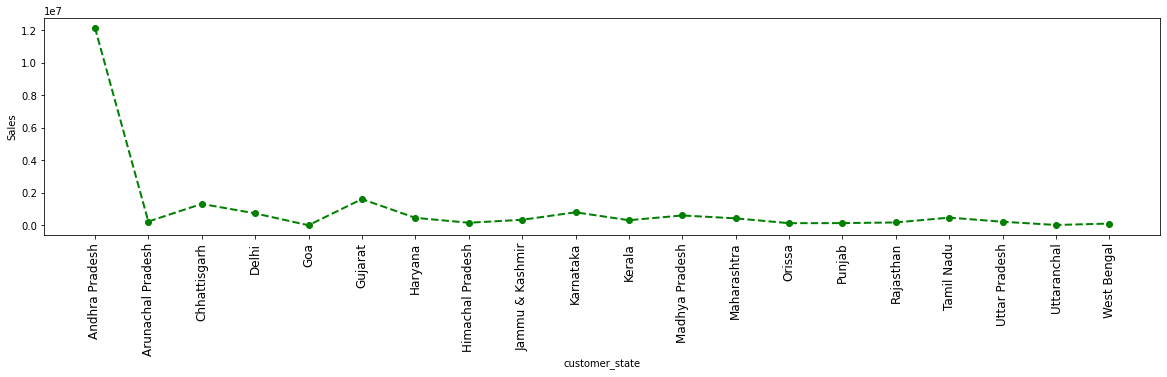

In [25]:
# State wise overall Sales
d = ecomm.groupby('customer_state').payment_value.sum().reset_index()
d.plot('customer_state', 'payment_value', figsize=(20,4),color='green', marker='.', linestyle='dashed', \
       linewidth=2, markersize=12, legend = None)
plt.xticks( range(0,len(d.customer_state)), d.customer_state,fontsize=12, rotation = 90)
plt.ylabel("Sales")
plt.show()

In [26]:
# Seasonality/trend of sales by product category
pd.pivot_table(ecomm, index=['product_category_name'],columns = ['Year','Month'], values=['payment_value'],\
                      aggfunc=np.sum, fill_value = "-")

payment_value                                      \
Year                                2016                      2017             
Month                                Dec      Oct    Sep       Apr       Aug   
product_category_name                                                          
Agro_Industry_And_Commerce             -        -      -         -     898.4   
Air_Conditioning                       -  4675.43      -   3347.31   7655.69   
Art                                    -        -      -    147.17    317.06   
Arts_And_Craftmanship                  -        -      -         -         -   
Audio                                  -   183.03      -   1508.51   1210.44   
...                                  ...      ...    ...       ...       ...   
Stationery                             -        -      -    5197.2   8962.12   
Tablets_Printing_Image                 -        -      -   1770.73    641.05   
Telephony                              -   742.82  75.06  10521.17  13908.39   
Toys                                   -  5670.74      -  17390.17  24185.58   
Watches_Gifts                          -  3468.04      -  26781.73  42705.07   

                                                                             \
Year                                                                          
Month                            Dec       Feb      Jan       Jul       Jun   
product_category_name                                                         
Agro_Industry_And_Commerce   6796.16     331.1   169.18   1199.47   1422.05   
Air_Conditioning              722.34   3439.71  1103.79   1493.13   3631.02   
Art                           191.76         -        -     424.9   2363.99   
Arts_And_Craftmanship              -         -        -    145.56         -   
Audio                        2941.12    247.85        -    883.23   1818.24   
...                              ...       ...      ...       ...       ...   
Stationery                  34075.12   2646.03  4709.73   9428.99   4339.88   
Tablets_Printing_Image        485.33    940.52        -    219.63    679.17   
Telephony                   21859.84  11636.38  3987.26  11980.32   9839.53   
Toys                        72588.17  11451.99  5581.35  29289.81  19362.01   
Watches_Gifts               81308.78  12778.51  8310.83  41946.39   31958.8   

                            ...                                           \
Year                        ...                 2018                       
Month                       ...       Sep        Apr       Aug       Feb   
product_category_name       ...                                            
Agro_Industry_And_Commerce  ...   2967.01    4783.66    7357.4   10863.9   
Air_Conditioning            ...   1900.33    4310.24   5519.73   3518.95   
Art                         ...    435.85    2623.04   2111.08   1869.19   
Arts_And_Craftmanship       ...         -      34.22   1069.05         -   
Audio                       ...   1191.79    9107.93    2715.0   3038.58   
...                         ...       ...        ...       ...       ...   
Stationery                  ...   8803.14   17765.59  20666.86  16502.91   
Tablets_Printing_Image      ...    279.88      70.24         -   1007.93   
Telephony                   ...  24886.54   30764.24  68240.47  27194.36   
Toys                        ...   42094.6   29290.91  27884.78  18879.33   
Watches_Gifts               ...  58431.48  111177.24  85215.66  74476.44   

                                                                       \
Year                                                                    
Month                             Jan        Jul        Jun       Mar   
product_category_name                                                   
Agro_Industry_And_Commerce    6761.99    8828.39    3843.05   7764.35   
Air_Conditioning              8126.78    3701.34   13923.04   3717.91   
Art                           2972.75    2265.73     3077.5  

In [27]:
# Seasonality/trend of quantity by product category
pd.pivot_table(ecomm, index=['product_category_name'],columns = ['Year','Month'], values=['order_item_id'],\
                      aggfunc=np.sum, fill_value = "-")

order_item_id                                  \
Year                                2016              2017                 
Month                                Dec   Oct  Sep    Apr    Aug    Dec   
product_category_name                                                      
Agro_Industry_And_Commerce             -     -    -      -   10.0   13.0   
Air_Conditioning                       -  18.0    -   18.0   19.0    3.0   
Art                                    -     -    -    1.0    4.0    4.0   
Arts_And_Craftmanship                  -     -    -      -      -      -   
Audio                                  -   2.0    -   14.0    9.0   18.0   
...                                  ...   ...  ...    ...    ...    ...   
Stationery                             -     -    -   36.0   87.0  282.0   
Tablets_Printing_Image                 -     -    -   14.0    8.0    6.0   
Telephony                              -  11.0  1.0  155.0  145.0  315.0   
Toys                                   -  29.0    -  129.0  213.0  490.0   
Watches_Gifts                          -   5.0    -  123.0  246.0  400.0   

                                                       ...                \
Year                                                   ...          2018   
Month                         Feb   Jan    Jul    Jun  ...    Sep    Apr   
product_category_name                                  ...                 
Agro_Industry_And_Commerce    9.0   4.0    1.0    1.0  ...    5.0   12.0   
Air_Conditioning             13.0   5.0    5.0   14.0  ...    8.0   24.0   
Art                             -     -    3.0   27.0  ...    3.0   26.0   
Arts_And_Craftmanship           -     -    1.0      -  ...      -    1.0   
Audio                         7.0     -    7.0   11.0  ...   11.0   34.0   
...                           ...   ...    ...    ...  ...    ...    ...   
Stationery                   21.0  30.0   92.0   39.0  ...   84.0  203.0   
Tablets_Printing_Image        8.0     -    2.0    8.0  ...    3.0    1.0   
Telephony                   130.0  31.0  171.0  180.0  ...  192.0  417.0   
Toys                         75.0  44.0  227.0  165.0  ...  345.0  220.0   
Watches_Gifts                42.0  11.0  198.0  138.0  ...  305.0  577.0   

                                                                             \
Year                                                                          
Month                         Aug    Feb    Jan    Jul    Jun    Mar    May   
product_category_name                                                         
Agro_Industry_And_Commerce   23.0   72.0   24.0   32.0   10.0   46.0    8.0   
Air_Conditioning             26.0   13.0   36.0   19.0   36.0   27.0   16.0   
Art                          21.0   15.0   20.0   22.0   29.0    7.0   38.0   
Arts_And_Craftmanship         9.0      -      -   12.0      -      -    1.0   
Audio                        33.0   15.0   28.0   23.0   22.0   36.0   23.0   
...                           ...    ...    ...    ...    ...    ...    ...   
Stationery                  183.0  200.0  450.0  228.0  209.0  196.0  142.0   
Tablets_Printing_Image          -   14.0    3.0      -    1.0    4.0    1.0   
Telephony                   360.0  478.0  417.0  253.0  256.0  386.0  278.0   
Toys                        199.0  169.0  180.0  176.0  223.0  267.0  235.0   
Watches_Gifts               460.0  384.0  474.0  574.0  553.0  467.0  711.0   

                                
Year                            
Month                      Sep  
product_category_name           
Agro_Industry_And_Commerce   -  
Air_Conditioning             -  
Art                          -  
Arts_And_Craftmanship        -  
Audio                        -  
...                         ..  
Stationery                   -  
Tablets_Printing_Image       -  
Telephony                    -  
Toys                         -  
Watches_Gifts                -  

[71 rows x 24 columns]

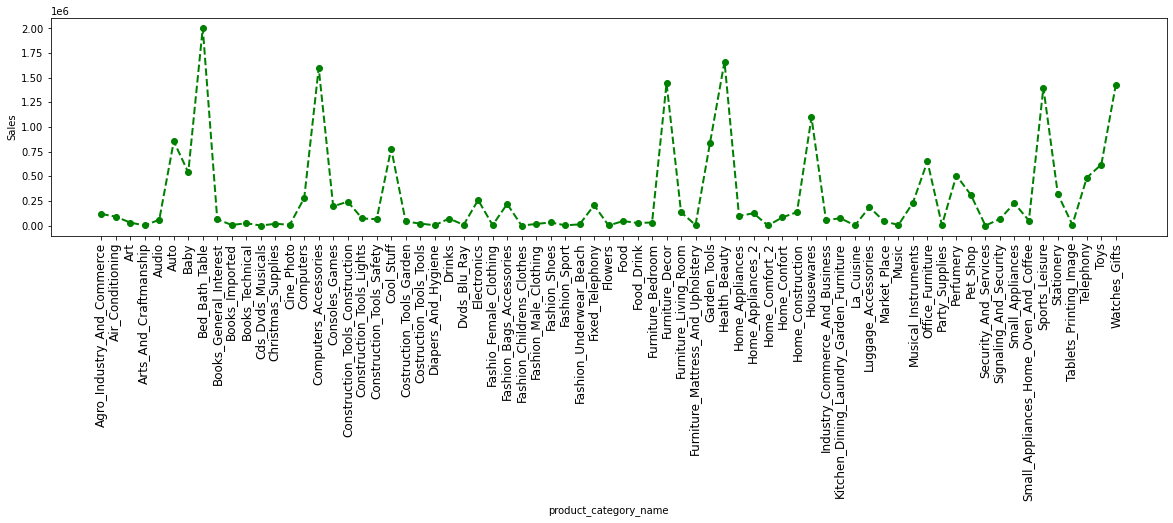

In [28]:
# Category wise overall Sales
d = ecomm.groupby('product_category_name').payment_value.sum().reset_index()
d.plot('product_category_name', 'payment_value', figsize=(20,4),color='green', marker='.', linestyle='dashed', \
       linewidth=2, markersize=12,legend = None)
plt.xticks( range(0,len(d.product_category_name)), d.product_category_name,fontsize=12, rotation =90)
plt.ylabel("Sales")
plt.show()

In [29]:
# Seasonality/trend of sales by customer city
pd.pivot_table(ecomm, index=['customer_city'],columns = ['Year','Month'], values=['payment_value'],\
                      aggfunc=np.sum, fill_value = "-")

payment_value                                                \
Year                    2016                 2017                            
Month                    Dec     Oct Sep      Apr     Aug      Dec     Feb   
customer_city                                                                
Aadityana                  -       -   -        -  247.32        -       -   
Aambaliyasan               -       -   -        -       -        -       -   
Aantaliya                  -       -   -   140.57  499.44   935.78  184.32   
Aarambhada                 -  160.44   -        -   317.8   876.95   79.95   
Abiramam                   -       -   -        -       -        -       -   
...                      ...     ...  ..      ...     ...      ...     ...   
Zamin Uthukuli             -       -   -        -       -        -       -   
Ziauddin Pur               -   89.16   -   586.66  643.08  1501.62  992.64   
Zira                       -       -   -        -       -        -       -   
Zirakpur                   -       -   -    59.55   73.34        -       -   
Ziro                       -       -   -  1125.02   55.01     79.9  122.71   

                                        ...                            \
Year                                    ...             2018            
Month              Jan     Jul     Jun  ...     Sep      Apr      Aug   
customer_city                           ...                             
Aadityana        127.9  128.65   317.8  ...       -        -   182.47   
Aambaliyasan         -       -       -  ...       -        -   159.89   
Aantaliya       195.44  828.39   67.53  ...  168.23  1923.93    77.62   
Aarambhada           -   239.5   978.9  ...  196.31   650.03        -   
Abiramam             -       -       -  ...       -        -        -   
...                ...     ...     ...  ...     ...      ...      ...   
Zamin Uthukuli       -       -       -  ...       -        -   157.57   
Ziauddin Pur         -  335.33   496.5  ...  705.99  2329.16  1698.66   
Zira                 -       -  140.52  ...       -   194.57   143.49   
Zirakpur        114.77       -       -  ...       -        -        -   
Ziro                 -       -  506.94  ...   77.57   567.84   303.08   

                                                                         
Year                                                                     
Month               Feb     Jan      Jul      Jun      Mar      May Sep  
customer_city                                                            
Aadityana        106.16  369.44   171.47   146.84    73.68   150.09   -  
Aambaliyasan          -   83.05        -        -        -        -   -  
Aantaliya        1580.6  837.55  2425.99   421.64  2242.86  1834.52   -  
Aarambhada       496.61  361.93    71.45        -    932.5    926.5   -  
Abiramam              -       -        -        -        -        -   -  
...                 ...     ...      ...      ...      ...      ...  ..  
Zamin Uthukuli        -   64.14        -        -        -        -   -  
Ziauddin Pur    1566.85  622.37  2728.26  2001.24  1238.86  2451.29   -  
Zira                  -       -        -        -    89.85        -   -  
Zirakpur              -       -        -        -        -        -   -  
Ziro             683.46  238.15   482.34   557.58    53.13   166.52   -  

[4110 rows x 24 columns]

In [30]:
# Seasonality/trend of quantity by customer city
pd.pivot_table(ecomm, index=['customer_city'],columns = ['Year','Month'], values=['order_item_id'],\
                      aggfunc=np.sum, fill_value = "-")

order_item_id                                                \
Year                    2016          2017                                   
Month                    Dec  Oct Sep  Apr  Aug   Dec  Feb  Jan  Jul   Jun   
customer_city                                                                
Aadityana                  -    -   -    -  1.0     -    -  1.0  2.0  11.0   
Aambaliyasan               -    -   -    -    -     -    -    -    -     -   
Aantaliya                  -    -   -  2.0  4.0  11.0  1.0  1.0  8.0   1.0   
Aarambhada                 -  1.0   -    -  1.0   8.0  1.0    -  3.0   3.0   
Abiramam                   -    -   -    -    -     -    -    -    -     -   
...                      ...  ...  ..  ...  ...   ...  ...  ...  ...   ...   
Zamin Uthukuli             -    -   -    -    -     -    -    -    -     -   
Ziauddin Pur               -  1.0   -  2.0  4.0  16.0  8.0    -  4.0   4.0   
Zira                       -    -   -    -    -     -    -    -    -   1.0   
Zirakpur                   -    -   -  1.0  1.0     -    -  1.0    -     -   
Ziro                       -    -   -  7.0  1.0   1.0  3.0    -    -   7.0   

                ...                                                           
Year            ...       2018                                                
Month           ...  Sep   Apr   Aug   Feb   Jan   Jul   Jun   Mar   May Sep  
customer_city   ...                                                           
Aadityana       ...    -     -   2.0   1.0   7.0   3.0   1.0   1.0   3.0   -  
Aambaliyasan    ...    -     -   1.0     -   1.0     -     -     -     -   -  
Aantaliya       ...  1.0   9.0   1.0  14.0  10.0  10.0   2.0   7.0  10.0   -  
Aarambhada      ...  4.0   4.0     -   5.0   2.0   1.0     -   8.0   9.0   -  
Abiramam        ...    -     -     -     -     -     -     -     -     -   -  
...             ...  ...   ...   ...   ...   ...   ...   ...   ...   ...  ..  
Zamin Uthukuli  ...    -     -   1.0     -   1.0     -     -     -     -   -  
Ziauddin Pur    ...  8.0  14.0  15.0  10.0   8.0  27.0  12.0  10.0  14.0   -  
Zira            ...    -   1.0   1.0     -     -     -     -   2.0     -   -  
Zirakpur        ...    -     -     -     -     -     -     -     -     -   -  
Ziro            ...  1.0   5.0   2.0   5.0   2.0   5.0   4.0   1.0   3.0   -  

[4110 rows x 24 columns]

In [31]:
# Capturing different weeks for which the data is avialable, into a variable
week = ecomm.order_purchase_timestamp.dt.isocalendar()[['week','year']].sort_values(by= ['year','week'], ignore_index=True)

In [32]:
# Seasonality/trend of sales by each week in a year
pd.pivot_table(ecomm, index=['geolocation_state'],columns = [week.year,week.week] ,values=['payment_value'],\
                      aggfunc=np.sum, fill_value = "-")

payment_value                                            \
year                       2016                                             
week                         35      36     39        40       41      51   
geolocation_state                                                           
Andhra Pradesh           482.35  157.73  173.3  55078.27  5802.01  150.17   
Arunachal Pradesh             -       -      -         -        -       -   
Chhattisgarh                  -       -      -     57.68        -       -   
Delhi                         -       -      -         -        -       -   
Goa                           -       -      -         -        -       -   
Gujarat                       -       -      -         -        -       -   
Haryana                       -       -      -         -        -       -   
Himachal Pradesh              -       -      -         -        -       -   
Jammu & Kashmir               -       -      -         -        -       -   
Karnataka                     -       -      -         -        -       -   
Kerala                        -       -      -         -        -       -   
Madhya Pradesh                -       -      -         -        -       -   
Maharashtra                   -       -      -         -        -       -   
Orissa                        -       -      -         -        -       -   
Punjab                        -       -      -         -        -       -   
Rajasthan                     -       -      -         -        -       -   
Tamil Nadu                    -       -      -         -        -       -   
Uttar Pradesh                 -       -      -     49.34        -       -   
Uttaranchal                   -       -      -         -        -       -   
West Bengal                   -       -      -         -        -       -   

                                                         ...             \
year                 2017                                ...       2018   
week                   1         2         3         4   ...         27   
geolocation_state                                        ...              
Andhra Pradesh     7351.6  10375.29  24766.53  48050.36  ...  132931.34   
Arunachal Pradesh       -    2642.3    514.84    830.19  ...    2295.13   
Chhattisgarh            -         -  11424.06  10677.15  ...   18506.23   
Delhi                   -         -         -   12605.0  ...    5948.63   
Goa                     -         -         -         -  ...          -   
Gujarat                 -         -         -   2397.17  ...   14923.94   
Haryana                 -         -         -         -  ...     4481.8   
Himachal Pradesh        -         -         -         -  ...    1215.33   
Jammu & Kashmir         -         -         -         -  ...     2067.5   
Karnataka               -         -         -         -  ...     8763.3   
Kerala                  -         -         -         -  ...    3148.79   
Madhya Pradesh          -         -         -         -  ...    5983.16   
Maharashtra             -         -         -         -  ...    2492.82   
Orissa                  -         -         -         -  ...     653.23   
Punjab                  -         -         -         -  ...    1709.72   
Rajasthan               -         -         -         -  ...     734.82   
Tamil Nadu              -         -         -         -  ...    4242.37   
Uttar Pradesh           -         -         -         -  ...    2527.44   
Uttaranchal             -         -         -         -  ...     302.32   
West Bengal             -         -         -         -  ...    5434.42   

                                                                          \
year                                                                       
week                      28         29         30         31         32   
geolocation_state                                                          
Andhra Pradesh     120226.07  195238.05  192868.84  256216.83  2

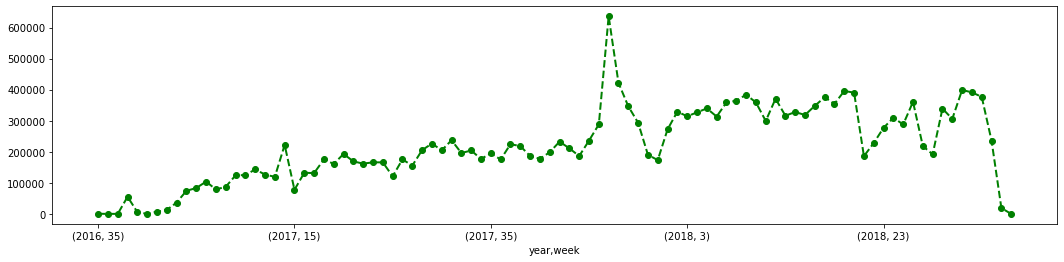

In [33]:
# Overall sales by each of 94 weeks
d = ecomm.groupby([week.year, week.week]).payment_value.sum()
d.plot(figsize= (18,4), use_index = True, fontsize = 10,color='green', marker='.', linestyle='dashed', \
       linewidth=2, markersize=12,legend = None)
plt.show()

In [34]:
# Seasonality/trend of quantity by each week in a year
pd.pivot_table(ecomm, index=['geolocation_state'],columns = [week.year,week.week] ,values=['order_item_id'],\
                      aggfunc=np.sum, fill_value = "-")

order_item_id                                          \
year                       2016                              2017         
week                         35   36   39     40    41   51    1     2    
geolocation_state                                                         
Andhra Pradesh              2.0  1.0  1.0  401.0  50.0  1.0  57.0  90.0   
Arunachal Pradesh             -    -    -      -     -    -     -  22.0   
Chhattisgarh                  -    -    -    1.0     -    -     -     -   
Delhi                         -    -    -      -     -    -     -     -   
Goa                           -    -    -      -     -    -     -     -   
Gujarat                       -    -    -      -     -    -     -     -   
Haryana                       -    -    -      -     -    -     -     -   
Himachal Pradesh              -    -    -      -     -    -     -     -   
Jammu & Kashmir               -    -    -      -     -    -     -     -   
Karnataka                     -    -    -      -     -    -     -     -   
Kerala                        -    -    -      -     -    -     -     -   
Madhya Pradesh                -    -    -      -     -    -     -     -   
Maharashtra                   -    -    -      -     -    -     -     -   
Orissa                        -    -    -      -     -    -     -     -   
Punjab                        -    -    -      -     -    -     -     -   
Rajasthan                     -    -    -      -     -    -     -     -   
Tamil Nadu                    -    -    -      -     -    -     -     -   
Uttar Pradesh                 -    -    -    1.0     -    -     -     -   
Uttaranchal                   -    -    -      -     -    -     -     -   
West Bengal                   -    -    -      -     -    -     -     -   

                                 ...                                         \
year                             ...    2018                                  
week                  3      4   ...      27     28      29      30      31   
geolocation_state                ...                                          
Andhra Pradesh     196.0  345.0  ...  1027.0  892.0  1485.0  1538.0  1814.0   
Arunachal Pradesh    6.0    4.0  ...    18.0   15.0    20.0    18.0    27.0   
Chhattisgarh        97.0   55.0  ...    93.0   77.0   138.0   153.0   127.0   
Delhi                  -   84.0  ...    43.0   36.0    79.0    72.0    83.0   
Goa                    -      -  ...       -      -       -       -       -   
Gujarat                -   13.0  ...   113.0   86.0   112.0   155.0   207.0   
Haryana                -      -  ...    33.0   22.0    37.0    72.0    53.0   
Himachal Pradesh       -      -  ...     7.0    4.0    25.0    18.0    17.0   
Jammu & Kashmir        -      -  ...    14.0   17.0    28.0    31.0    49.0   
Karnataka              -      -  ...    75.0   33.0    81.0    81.0    93.0   
Kerala                 -      -  ...    23.0   19.0    44.0    32.0    53.0   
Madhya Pradesh         -      -  ...    46.0   29.0    64.0    53.0    55.0   
Maharashtra            -      -  ...    24.0   27.0    81.0    22.0    59.0   
Orissa                 -      -  ...     7.0    6.0     7.0     6.0    14.0   
Punjab                 -      -  ...    11.0   13.0     5.0     8.0    25.0   
Rajasthan              -      -  ...     6.0    7.0    21.0    19.0    19.0   
Tamil Nadu             -      -  ...    19.0   44.0    33.0    29.0    42.0   
Uttar Pradesh          -      -  ...    20.0   13.0    25.0    22.0    22.0   
Uttaranchal            -      -  ...     3.0    1.0     3.0     1.0     1.0   
West Bengal            -      -  ...    18.0   13.0    28.0    25.0    20.0   

                                                      
year                                                  
week                   32      33     34     35   36  
geolocation_state                                     
Andhra Pradesh     1674.0  1658.0  975.0  114.0  1.0  
Arunachal Pradesh    31.0    94.0   12.0    1

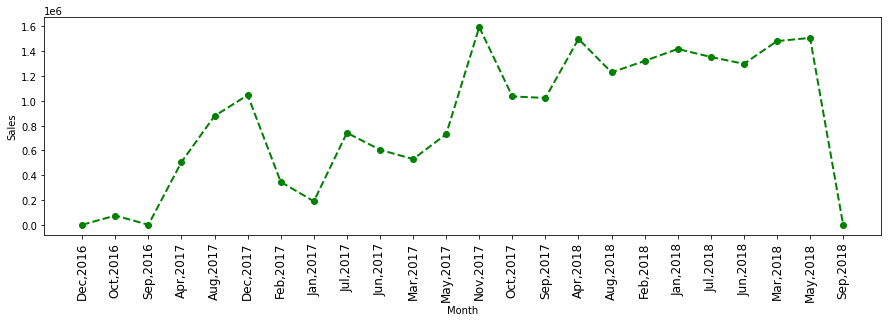

In [38]:
# Trend of sales by each month in the dataset
d = ecomm.groupby(['Year','Month']).payment_value.sum().reset_index()
d.plot('Month', 'payment_value', figsize=(15,4),color='green', marker='.', linestyle='dashed', \
       linewidth=2, markersize=12,legend = None)
plt.xticks( range(0,len(d['Month'])), d['Month']+ ','+ d['Year'],fontsize=12, rotation =90)
plt.ylabel("Sales")
plt.show()

In [37]:
# Seasonality/trend of sales by days in a month
pd.pivot_table(ecomm, index= 'geolocation_city' ,columns = day,values=['payment_value'],\
                      aggfunc=np.sum, fill_value = "-")

payment_value                                    \
order_purchase_timestamp            01       02      03      04       05   
geolocation_city                                                           
Aadityana                            -    47.84       -       -        -   
Aambaliyasan                         -        -  159.89       -        -   
Aantaliya                      1128.07    421.9  327.63  882.49   829.45   
Abiramam                             -        -       -       -        -   
Abohar                               -        -       -       -    59.11   
...                                ...      ...     ...     ...      ...   
Zamania                              -        -       -       -        -   
Ziauddin Pur                   1013.64  1157.16  292.32  554.49  1221.24   
Zira                                 -        -       -       -        -   
Zirakpur                         73.34        -       -       -   352.98   
Ziro                             40.52    48.21  590.02  278.21     79.9   

                                                                    ...  \
order_purchase_timestamp       06      07      08      09       10  ...   
geolocation_city                                                    ...   
Aadityana                   72.84       -       -  159.69    73.68  ...   
Aambaliyasan                83.05       -       -       -        -  ...   
Aantaliya                  375.58  1004.5  928.16  473.41   943.13  ...   
Abiramam                        -       -       -   89.19        -  ...   
Abohar                          -       -       -       -        -  ...   
...                           ...     ...     ...     ...      ...  ...   
Zamania                         -       -       -       -        -  ...   
Ziauddin Pur              1470.76  476.18  978.86  545.46   917.21  ...   
Zira                            -       -  143.49       -   194.57  ...   
Zirakpur                        -       -       -       -        -  ...   
Ziro                            -   82.19  175.22  228.79  1326.33  ...   

                                                                          \
order_purchase_timestamp      22      23      24      25      26      27   
geolocation_city                                                           
Aadityana                 135.49       -   173.7  103.93       -       -   
Aambaliyasan                   -       -       -       -       -       -   
Aantaliya                 994.75  303.32       -  466.37  932.78  765.17   
Abiramam                       -       -       -       -       -       -   
Abohar                         -       -       -   46.59       -       -   
...                          ...     ...     ...     ...     ...     ...   
Zamania                        -  287.64       -       -       -       -   
Ziauddin Pur              821.47       -  880.42  861.75  375.53  468.06   
Zira                           -       -       -       -  140.52       -   
Zirakpur                       -       -       -       -  114.77       -   
Ziro                       99.01       -  358.49  994.02  162.59       -   

                                                           
order_purchase_timestamp       28      29      30      31  
geolocation_city                                           
Aadityana                   321.6       -   127.9       -  
Aambaliyasan                    -       -       -       -  
Aantaliya                  671.98  239.72       -   88.39  
Abiramam                        -       -       -       -  
Abohar                          -       -       -   56.22  
...                           ...     ...     ...     ...  
Zamania                         -       -       -       -  
Ziauddin Pur              3117.35  550.85  385.43   816.0  
Zira                            -       -       -       -  
Zirakpur                        -       -       -       -  
Ziro                       166.44  421.39       -  434.13  

[37

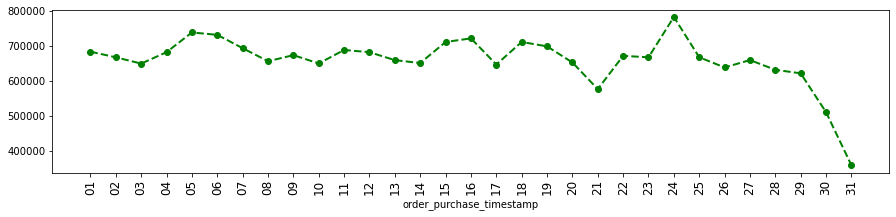

In [38]:
# Trend of overall sales by days
d = ecomm.groupby(day).payment_value.sum()
d.plot(figsize = (15,3),color='green', marker='.', linestyle='dashed', linewidth=2, markersize=12)
plt.xticks( range(0,len(d.index)), d.index,fontsize=12, rotation =90)
plt.show()

In [39]:
# Seasonality/trend of quantity by days in a month
pd.pivot_table(ecomm, index= 'geolocation_city' ,columns = day,values=['order_item_id'],\
                      aggfunc=np.sum, fill_value = "-")

order_item_id                                       \
order_purchase_timestamp            01   02   03   04   05    06    07   08   
geolocation_city                                                              
Aadityana                            -  1.0    -    -    -   1.0     -    -   
Aambaliyasan                         -    -  1.0    -    -   1.0     -    -   
Aantaliya                          2.0  4.0  2.0  3.0  5.0   2.0  12.0  3.0   
Abiramam                             -    -    -    -    -     -     -    -   
Abohar                               -    -    -    -  1.0     -     -    -   
...                                ...  ...  ...  ...  ...   ...   ...  ...   
Zamania                              -    -    -    -    -     -     -    -   
Ziauddin Pur                      11.0  6.0  3.0  4.0  9.0  10.0   3.0  6.0   
Zira                                 -    -    -    -    -     -     -  1.0   
Zirakpur                           1.0    -    -    -  1.0     -     -    -   
Ziro                               1.0  1.0  5.0  2.0  1.0     -   2.0  2.0   

                                    ...                                      \
order_purchase_timestamp   09   10  ...   22   23   24   25   26   27    28   
geolocation_city                    ...                                       
Aadityana                 1.0  1.0  ...  2.0    -  3.0  1.0    -    -   6.0   
Aambaliyasan                -    -  ...    -    -    -    -    -    -     -   
Aantaliya                 4.0  4.0  ...  4.0  1.0    -  6.0  6.0  8.0   5.0   
Abiramam                  1.0    -  ...    -    -    -    -    -    -     -   
Abohar                      -    -  ...    -    -    -  1.0    -    -     -   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
Zamania                     -    -  ...    -  1.0    -    -    -    -     -   
Ziauddin Pur              4.0  7.0  ...  3.0    -  7.0  6.0  4.0  7.0  25.0   
Zira                        -  1.0  ...    -    -    -    -  1.0    -     -   
Zirakpur                    -    -  ...    -    -    -    -  1.0    -     -   
Ziro                      1.0  6.0  ...  1.0    -  2.0  4.0  1.0    -   2.0   

                                         
order_purchase_timestamp   29   30   31  
geolocation_city                         
Aadityana                   -  1.0    -  
Aambaliyasan                -    -    -  
Aantaliya                 1.0    -  1.0  
Abiramam                    -    -    -  
Abohar                      -    -  1.0  
...                       ...  ...  ...  
Zamania                     -    -    -  
Ziauddin Pur              5.0  3.0  7.0  
Zira                        -    -    -  
Zirakpur                    -    -    -  
Ziro                      7.0    -  4.0  

[3789 rows x 31 columns]

In [40]:
# Seasonality/trend of sales by hours in a day
pd.pivot_table(ecomm, index='customer_city', columns = hour,values=['payment_value'], aggfunc=np.sum, fill_value = "-")

payment_value                                         \
order_purchase_timestamp            00      01 02    03     04     05      06   
customer_city                                                                   
Aadityana                       146.84       -  -     -      -      -       -   
Aambaliyasan                         -       -  -     -      -      -       -   
Aantaliya                       361.52  162.84  -     -      -      -  316.64   
Aarambhada                      244.62       -  -     -      -      -       -   
Abiramam                             -       -  -     -      -      -       -   
...                                ...     ... ..   ...    ...    ...     ...   
Zamin Uthukuli                       -   64.14  -     -      -      -       -   
Ziauddin Pur                   1500.38  385.11  -  99.7  68.13      -       -   
Zira                                 -       -  -     -      -      -       -   
Zirakpur                             -       -  -     -      -      -       -   
Ziro                             87.14       -  -     -      -  79.61       -   

                                                  ...                    \
order_purchase_timestamp      07      08      09  ...       14       15   
customer_city                                     ...                     
Aadityana                      -  159.69   47.84  ...        -   106.16   
Aambaliyasan                   -       -       -  ...        -        -   
Aantaliya                      -  656.88  943.13  ...   764.87  1656.09   
Aarambhada                     -  513.56  792.26  ...   471.83   169.35   
Abiramam                       -       -       -  ...        -        -   
...                          ...     ...     ...  ...      ...      ...   
Zamin Uthukuli                 -       -       -  ...        -        -   
Ziauddin Pur              238.83  319.86  1575.1  ...  1421.53  1456.95   
Zira                           -       -       -  ...        -   335.09   
Zirakpur                       -       -       -  ...        -        -   
Ziro                       233.8       -  419.05  ...   984.64    55.01   

                                                                               \
order_purchase_timestamp       16       17       18       19       20      21   
customer_city                                                                   
Aadityana                  326.86        -    127.9        -   713.08       -   
Aambaliyasan                    -    83.05        -        -        -       -   
Aantaliya                 1571.22   825.66   575.96  2432.27  1522.06  1001.9   
Aarambhada                 632.76   285.61   123.37   820.61   567.22       -   
Abiramam                        -        -        -        -        -       -   
...                           ...      ...      ...      ...      ...     ...   
Zamin Uthukuli                  -        -        -        -        -       -   
Ziauddin Pur               758.32  2823.47  2189.45   547.14  1122.57  641.26   
Zira                            -        -   143.49        -        -   89.85   
Zirakpur                        -    73.34        -   352.98        -       -   
Ziro                       208.72  1648.16    317.0   595.97    77.57   47.22   

                                           
order_purchase_timestamp       22      23  
customer_city                              
Aadityana                   78.59       -  
Aambaliyasan                    -       -  
Aantaliya                 1181.58  617.82  
Aarambhada                 376.59       -  
Abiramam                        -       -  
...                           ...     ...  
Zamin Uthukuli                  -       -  
Ziauddin Pur              2235.87  595.46  
Zira                            -       -  
Zirakpur                        -       -  
Ziro                       261.44  289.52  

[4110 rows x 24 columns]

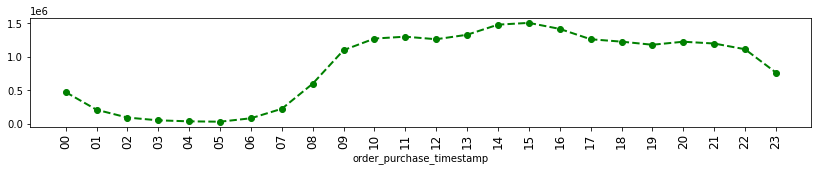

In [41]:
# Overall trend of sales by hours
d = ecomm.groupby(hour).payment_value.sum()
d.plot(figsize = (14,2),color='green', marker='.', linestyle='dashed', linewidth=2, markersize=12)
plt.xticks( range(0,len(d.index)), d.index,fontsize=12, rotation =90)
plt.show()

In [42]:
# Seasonality/trend of quantity by hours in a day
pd.pivot_table(ecomm, index='customer_city', columns = hour,values=['order_item_id'], aggfunc=np.sum, fill_value = "-")

order_item_id                                        \
order_purchase_timestamp            00   01 02   03   04   05   06   07   08   
customer_city                                                                  
Aadityana                          1.0    -  -    -    -    -    -    -  1.0   
Aambaliyasan                         -    -  -    -    -    -    -    -    -   
Aantaliya                         12.0  2.0  -    -    -    -  1.0    -  3.0   
Aarambhada                         1.0    -  -    -    -    -    -    -  3.0   
Abiramam                             -    -  -    -    -    -    -    -    -   
...                                ...  ... ..  ...  ...  ...  ...  ...  ...   
Zamin Uthukuli                       -  1.0  -    -    -    -    -    -    -   
Ziauddin Pur                      12.0  2.0  -  1.0  1.0    -    -  2.0  4.0   
Zira                                 -    -  -    -    -    -    -    -    -   
Zirakpur                             -    -  -    -    -    -    -    -    -   
Ziro                               1.0    -  -    -    -  1.0    -  3.0    -   

                                ...                                           \
order_purchase_timestamp    09  ...   14    15    16    17    18    19    20   
customer_city                   ...                                            
Aadityana                  1.0  ...    -   1.0   5.0     -   1.0     -  18.0   
Aambaliyasan                 -  ...    -     -     -   1.0     -     -     -   
Aantaliya                  7.0  ...  6.0   6.0   6.0   5.0   5.0  12.0  10.0   
Aarambhada                 2.0  ...  4.0   2.0   6.0   2.0   2.0   9.0   5.0   
Abiramam                     -  ...    -     -     -     -     -     -     -   
...                        ...  ...  ...   ...   ...   ...   ...   ...   ...   
Zamin Uthukuli               -  ...    -     -     -     -     -     -     -   
Ziauddin Pur              11.0  ...  6.0  10.0  11.0  16.0  14.0   7.0  12.0   
Zira                         -  ...    -   2.0     -     -   1.0     -     -   
Zirakpur                     -  ...    -     -     -   1.0     -   1.0     -   
Ziro                       3.0  ...  3.0   1.0   2.0   8.0   2.0   6.0   1.0   

                                          
order_purchase_timestamp   21    22   23  
customer_city                             
Aadityana                   -   2.0    -  
Aambaliyasan                -     -    -  
Aantaliya                 9.0   9.0  4.0  
Aarambhada                  -   4.0    -  
Abiramam                    -     -    -  
...                       ...   ...  ...  
Zamin Uthukuli              -     -    -  
Ziauddin Pur              5.0  15.0  4.0  
Zira                      2.0     -    -  
Zirakpur                    -     -    -  
Ziro                      1.0   3.0  6.0  

[4110 rows x 24 columns]

In [43]:
# Dividing hours into 4 groups
hr_grp = np.where(hour.isin(['04','05','06', '07', '08', '09', '10', '11']), "Morning", np.where(hour.isin\
                           (['12','13', '14', '15']), "Afternoon", np.where(hour.isin\
                           (['16', '17','18','19','20']), "Evening","Night")))
sort_order = ['Morning','Afternoon','Evening','Night']
hr_grp = pd.CategoricalIndex(hr_grp, categories = sort_order, ordered = True)

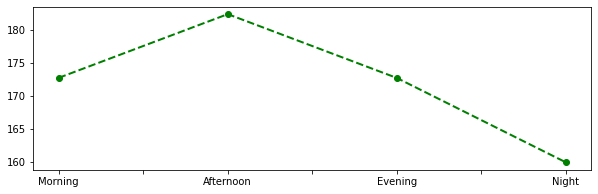

In [44]:
# Overall trend of sales by 4 parts of a day
ecomm.groupby(hr_grp).payment_value.mean().plot(figsize = (10,3), color = "green", marker='.', linestyle='dashed',\
                                                        linewidth=2, markersize=12)
plt.show()

In [45]:
# Seasonality/trend of sales by payment type/channel
ecomm.pivot_table(index = 'payment_type', columns = ['Year','Month'], values ='payment_value', aggfunc = "sum").fillna('-')

Year           2016                         2017                        \
Month           Dec       Oct     Sep        Apr        Aug        Dec   
payment_type                                                             
UPI               -  13981.39       -  120283.13  174380.09  219715.09   
credit_card   19.62  59733.34  347.52  371484.98  683036.78  794029.86   
debit_card        -    241.73       -    2898.84    3584.98    7912.44   
voucher           -    817.08       -   12233.55   17025.19   24772.49   

Year                                                      ...             \
Month               Feb        Jan        Jul        Jun  ...        Sep   
payment_type                                              ...              
UPI            72366.68   34496.88  162640.33  147283.39  ...  187363.26   
credit_card   265545.51  148761.53  556878.03  442029.18  ...  807402.98   
debit_card      1664.04     788.19    2443.22    2645.83  ...    5061.73   
voucher         6704.76    5523.42   19974.81   13680.90  ...   23533.19   

Year                2018                                               \
Month                Apr        Aug        Feb         Jan        Jul   
payment_type                                                            
UPI            303119.63  172208.60  297451.23   284488.94  306189.67   
credit_card   1156919.64  985340.82  988396.67  1082782.60  978714.90   
debit_card      14701.61   52253.26   10167.33    13501.11   46601.59   
voucher         24646.86   19945.74   26325.18    37705.86   23044.78   

Year                                                      
Month                Jun         Mar         May     Sep  
payment_type                                              
UPI            197541.61   269517.65   294946.82       -  
credit_card   1032207.98  1174881.20  1173085.54       -  
debit_card      41331.28     9150.95    14689.89       -  
voucher         27511.30    28674.29    25150.34  166.46  

[4 rows x 24 columns]

In [46]:
# Seasonality/trend of quantity by payment type/channel
ecomm.pivot_table(index = 'payment_type', columns = ['Year','Month'], values ='order_item_id', aggfunc = "sum").fillna('-')

Year         2016                2017                                         \
Month         Dec    Oct  Sep     Apr     Aug     Dec     Feb    Jan     Jul   
payment_type                                                                   
UPI             -   98.0    -   699.0  1291.0  1677.0   525.0  315.0  1186.0   
credit_card   1.0  361.0  4.0  2339.0  4598.0  5546.0  1718.0  977.0  4236.0   
debit_card      -    2.0    -    29.0    42.0    71.0    15.0   11.0    24.0   
voucher         -   22.0    -   214.0   426.0   385.0   130.0   90.0   441.0   

Year                  ...            2018                                  \
Month            Jun  ...     Sep     Apr     Aug     Feb     Jan     Jul   
payment_type          ...                                                   
UPI            994.0  ...  1310.0  2066.0  1493.0  2112.0  2163.0  1838.0   
credit_card   3065.0  ...  4366.0  7392.0  6556.0  7204.0  7370.0  6224.0   
debit_card      31.0  ...    49.0   157.0   337.0   111.0   136.0   289.0   
voucher        260.0  ...   397.0   428.0   307.0   379.0   574.0   335.0   

Year                                       
Month            Jun     Mar     May  Sep  
payment_type                               
UPI           1520.0  1962.0  1890.0    -  
credit_card   6660.0  7737.0  7593.0    -  
debit_card     241.0    88.0    58.0    -  
voucher        473.0   469.0   447.0  1.0  

[4 rows x 24 columns]

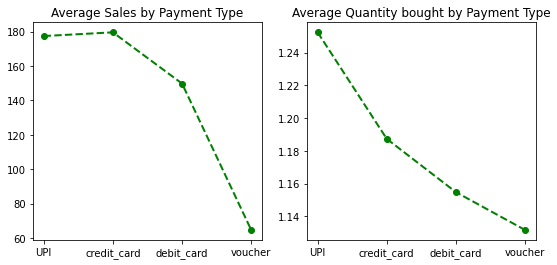

In [47]:
# Sales and quantity by payment method
fig,ax = plt.subplots(1,2, figsize = (9,4))
ax[0].title.set_text("Average Sales by Payment Type")
ax[0].plot(ecomm.groupby('payment_type').payment_value.mean(), color='green', marker='.', linestyle='dashed',\
                                                        linewidth=2, markersize=12)
ax[1].title.set_text("Average Quantity bought by Payment Type")
ax[1].plot(ecomm.groupby('payment_type').order_item_id.mean(), color='green', marker='.', linestyle='dashed',\
                                                        linewidth=2, markersize=12)
plt.show()

### Popular products by different parameters

In [48]:
# Sorting months in chronological order
sort_mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ecomm['Month'] = pd.CategoricalIndex(ecomm['Month'], categories = sort_mon, ordered = True)

In [49]:
# Popular categories by months
for m in sort_mon:
    lst= ecomm[ecomm['Month'] == m].groupby(['product_category_name']).order_item_id.sum()\
    .reset_index().sort_values(by = "order_item_id", ascending =False).head(5)
    print(" \t\t ",m,"\n", lst,"\n")    

 		  Jan 
     product_category_name  order_item_id
6          Bed_Bath_Table           1574
36        Furniture_Decor           1211
13  Computers_Accessories            964
62         Sports_Leisure            914
40          Health_Beauty            827 

 		  Feb 
     product_category_name  order_item_id
13  Computers_Accessories           1590
6          Bed_Bath_Table           1303
39          Health_Beauty            992
58         Sports_Leisure            939
35        Furniture_Decor            928 

 		  Mar 
     product_category_name  order_item_id
6          Bed_Bath_Table           1664
36        Furniture_Decor           1367
12  Computers_Accessories           1206
61         Sports_Leisure           1180
40          Health_Beauty           1005 

 		  Apr 
    product_category_name  order_item_id
7         Bed_Bath_Table           1532
38       Furniture_Decor           1121
42         Health_Beauty           1024
63        Sports_Leisure            955
48          

In [50]:
# Popular categories by states
for s in ecomm.geolocation_state.unique():
    lst= ecomm[ecomm['geolocation_state'] == s].groupby(['product_category_name']).order_item_id.sum().reset_index().\
    sort_values(by = "order_item_id", ascending =False).head(5)
    print("\t\t",s,"\n", lst,"\n") 

		 Andhra Pradesh 
     product_category_name  order_item_id
7          Bed_Bath_Table          11320
39        Furniture_Decor           7881
43          Health_Beauty           7591
15  Computers_Accessories           6789
65         Sports_Leisure           6637 

		 Chhattisgarh 
    product_category_name  order_item_id
7         Bed_Bath_Table            910
36       Furniture_Decor            810
40         Health_Beauty            647
61        Sports_Leisure            553
46            Housewares            522 

		 Uttar Pradesh 
     product_category_name  order_item_id
5          Bed_Bath_Table            131
26        Furniture_Decor            112
29          Health_Beauty            110
46         Sports_Leisure            100
11  Computers_Accessories             87 

		 Arunachal Pradesh 
    product_category_name  order_item_id
29       Furniture_Decor            167
6         Bed_Bath_Table            155
36            Housewares            151
48        Sports_Leisu

In [51]:
# Popular categories by sellers
for se in ecomm.seller_id.unique():
    lst= ecomm[ecomm['seller_id'] == se].groupby(['product_category_name']).order_item_id.sum().reset_index()\
    .sort_values(by = "order_item_id", ascending =False).head(5)
    print("  ",se,"\n", lst,"\n") 

   7c67e1448b00f6e969d365cea6b010ab 
    product_category_name  order_item_id
4       Office_Furniture           2101
2        Furniture_Decor            149
3  Furniture_Living_Room             34
5         Sports_Leisure             26
0                   Auto              3 

   b8bc237ba3788b23da09c0f1f3a3288c 
   product_category_name  order_item_id
0            Housewares             51 

   4a3ca9315b744ce9f8e9374361493884 
   product_category_name  order_item_id
1        Bed_Bath_Table           1933
5          Home_Confort            318
3       Furniture_Decor            101
6                  Toys             68
4        Home_Comfort_2             36 

   8f2ce03f928b567e3d56181ae20ae952 
   product_category_name  order_item_id
0        Sports_Leisure            205 

   9f505651f4a6abe901a56cdc21508025 
    product_category_name  order_item_id
1  Computers_Accessories            477
4             Housewares             43
5    Musical_Instruments             13
2         Co

In [52]:
# Popular products by Category
for cat in ecomm.product_category_name.unique():
    lst= ecomm[ecomm['product_category_name'] == cat].groupby(['product_id']).order_item_id.sum()\
    .reset_index().sort_values(by = "order_item_id", ascending =False).head(5)
    print("\t\t ",cat,"\n", lst,"\n") 

		  Office_Furniture 
                            product_id  order_item_id
182  8ed094bfe076c568f6bb10feada3f75d            124
89   3eef0cb94ba82de806bb30ab743c7655            122
226  b114bf337c0626166abe574eee9e3f32            112
217  a9516a079e37a9c9c36b9b78b10169e8             97
219  aba86c093ccdbac75b09111d57e50004             79 

		  Housewares 
                             product_id  order_item_id
596   42a2c92a0979a949ca4ea89ec5c7b934            212
1330  928e52a9ad53a294fdcc91bcf59d1751            129
470   32e18e89237933ebdaaebd78a27e7fa1            102
809   5a6e53c3b4e8684b13388d6aa4afdf12             91
44    03e1c946c0ddfc58724ff262aef08dff             80 

		  Home_Confort 
                           product_id  order_item_id
21  35afc973633aaeb6b877ff57b2793310            222
87  ca0019454bd5ddca0f4022fe89f6557a             14
83  c6bf8cc852eee5c4ab264e792a9c23a1             14
42  7248b99ff380f23a1094ff737a1112fb             11
10  186052b3f166a0f7227e78b2d27652d

### Popular categories by state and month

In [53]:
# Popular categories by state and month
for s in ecomm.geolocation_state.unique():
    for m in sort_mon:
        lst= ecomm[(ecomm['geolocation_state'] == s) & (ecomm['Month'] == m)].groupby('product_category_name')\
        .order_item_id.sum().reset_index().sort_values(by = "order_item_id", ascending = False).head(5)
        print("  \t ",s,"-->>",m,"\n", lst,"\n") 

  	  Andhra Pradesh -->> Jan 
     product_category_name  order_item_id
6          Bed_Bath_Table            985
35        Furniture_Decor            730
13  Computers_Accessories            614
59         Sports_Leisure            549
39          Health_Beauty            525 

  	  Andhra Pradesh -->> Feb 
     product_category_name  order_item_id
12  Computers_Accessories           1046
6          Bed_Bath_Table            865
33        Furniture_Decor            624
37          Health_Beauty            623
55         Sports_Leisure            576 

  	  Andhra Pradesh -->> Mar 
     product_category_name  order_item_id
6          Bed_Bath_Table           1134
36        Furniture_Decor            895
60         Sports_Leisure            794
12  Computers_Accessories            791
40          Health_Beauty            638 

  	  Andhra Pradesh -->> Apr 
    product_category_name  order_item_id
7         Bed_Bath_Table           1009
37       Furniture_Decor            739
41         H

### Top 10 most expensive products 

In [54]:
# List of top 10 most expensive products
tbl = ecomm.groupby('product_category_name')[['payment_value','order_item_id']].sum()
# Dividing total revenue by total quantity to get the average price per unit
tbl['Avg Price($)'] = tbl.payment_value/ tbl.order_item_id
tbl.sort_values("Avg Price($)", ascending = False).iloc[0:10, 2:3]

,Avg Price($)
product_category_name,
Computers,1103.247233
Small_Appliances_Home_Oven_And_Coffee,648.472405
Fixed_Telephony,552.189467
Home_Appliances_2,454.097935
Agro_Industry_And_Commerce,375.729778
Small_Appliances,293.590337
Musical_Instruments,288.259209
Construction_Tools_Safety,255.607121
Air_Conditioning,247.746359


### Divide customers into groups based on revenue 

In [55]:
# Summarizing the data by customers
df = ecomm.groupby('customer_id').payment_value.sum().reset_index().rename(columns = {'payment_value':'Total Revenue'})

In [56]:
# Assigning customers to deciles based on revenue
df['Decile'] = pd.qcut( df['Total Revenue'], 10, labels = None )
df

,customer_id,Total Revenue,Decile
0,00012a2ce6f8dcda20d059ce98491703,114.74,"(110.32, 137.26]"
1,000161a058600d5901f007fab4c27140,67.41,"(55.09, 70.03]"
2,0001fd6190edaaf884bcaf3d49edf079,195.42,"(172.16, 230.34]"
3,0002414f95344307404f0ace7a26f1d5,179.35,"(172.16, 230.34]"
4,000379cdec625522490c315e70c7a9fb,107.01,"(87.95, 110.32]"
...,...,...,...
98660,fffcb937e9dd47a13f05ecb8290f4d3e,91.91,"(87.95, 110.32]"
98661,fffecc9f79fd8c764f843e9951b11341,81.36,"(70.03, 87.95]"
98662,fffeda5b6d849fbd39689bb92087f431,63.13,"(55.09, 70.03]"
98663,ffff42319e9b2d713724ae527742af25,214.13,"(172.16, 230.34]"


In [57]:
# Number of customers and their total revenue by each decile
df.groupby('Decile')[['customer_id','Total Revenue']].agg({'customer_id': 'count',  'Total Revenue': 'sum'}).\
rename(columns = {'customer_id':'# Customers'})

,# Customers,Total Revenue
Decile,,
"(9.589, 39.84]",9875,310059.19
"(39.84, 55.09]",9886,468879.69
"(55.09, 70.03]",9853,617746.91
"(70.03, 87.95]",9853,776201.61
"(87.95, 110.32]",9867,976586.12
"(110.32, 137.26]",9866,1214043.91
"(137.26, 172.16]",9866,1517263.82
"(172.16, 230.34]",9868,1956599.12
"(230.34, 387.434]",9864,2914925.90


### Divide the sellers into gropus based on revenue generated

In [58]:
# Summarizing the revenue by sellers
df = ecomm.groupby('seller_id').payment_value.sum().reset_index().rename(columns = {'payment_value':'Total Revenue'})

In [59]:
# Assigning sellers to 10 groups based on revenue
df['Decile'] = pd.qcut( df['Total Revenue'], 10, labels = None )
df

,seller_id,Total Revenue,Decile
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,"(2068.78, 3736.356]"
1,001cca7ae9ae17fb1caed9dfb1094831,48349.22,"(14712.368, 512645.19]"
2,001e6ad469a905060d959994f1b41e4f,267.94,"(232.942, 429.784]"
3,002100f778ceb8431b7a1020ff7ab48f,2478.33,"(2068.78, 3736.356]"
4,003554e2dce176b5555353e4f3555ac8,139.38,"(113.762, 232.942]"
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52,"(12.219000000000001, 113.762]"
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52,"(2068.78, 3736.356]"
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55,"(2068.78, 3736.356]"
3093,fffd5413c0700ac820c7069d66d98c89,12834.27,"(6790.908, 14712.368]"


In [60]:
# Number of sellers and total revenue by each decile
df.groupby('Decile')[['seller_id','Total Revenue']].agg({'seller_id': 'count',  'Total Revenue': 'sum'}).\
rename(columns = {'seller_id':'# Sellers'})

,# Sellers,Total Revenue
Decile,,
"(12.219000000000001, 113.762]",310,21362.43
"(113.762, 232.942]",309,53446.84
"(232.942, 429.784]",310,99647.39
"(429.784, 789.456]",309,182230.09
"(789.456, 1255.71]",310,311617.52
"(1255.71, 2068.78]",309,497196.77
"(2068.78, 3736.356]",309,862504.98
"(3736.356, 6790.908]",310,1565699.50
"(6790.908, 14712.368]",309,3099557.89


### Cross-Selling (which products are selling together)

In [61]:
# List of products bought, by customer_id
q3 = ecomm.groupby('customer_id').agg({'product_category_name': lambda x: x.ravel().tolist()}).reset_index()

In [62]:
# Dropping lists with only one product 
my_ser = []
for i in range(0, len(q3.product_category_name)):
    if str(q3.product_category_name[i]).find(',') != -1:
        my_ser.append(q3.product_category_name[i])
my_ser = pd.Series(my_ser)
print(my_ser)

0        [Garden_Tools, Garden_Tools, Garden_Tools, Gar...
1                       [Furniture_Decor, Furniture_Decor]
2        [Bed_Bath_Table, Bed_Bath_Table, Bed_Bath_Tabl...
3                     [Housewares, Housewares, Housewares]
4                                   [Telephony, Telephony]
                               ...                        
12921    [Furniture_Decor, Furniture_Decor, Furniture_D...
12922     [Sports_Leisure, Sports_Leisure, Sports_Leisure]
12923    [Books_General_Interest, Books_General_Interes...
12924     [Bed_Bath_Table, Bed_Bath_Table, Bed_Bath_Table]
12925                   [Furniture_Decor, Furniture_Decor]
Length: 12926, dtype: object


In [63]:
# Creating the combinations of two products bought together
combinations_list = []
for row in my_ser:
    combinations = list(itertools.combinations(row, 2))
    combinations_list.append(combinations)

In [64]:
# Unlisting the combinations
combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)
combination_counts

0                            (Garden_Tools, Garden_Tools)
1                            (Garden_Tools, Garden_Tools)
2                            (Garden_Tools, Garden_Tools)
3                            (Garden_Tools, Garden_Tools)
4                            (Garden_Tools, Garden_Tools)
                               ...                       
39689    (Books_General_Interest, Books_General_Interest)
39690                    (Bed_Bath_Table, Bed_Bath_Table)
39691                    (Bed_Bath_Table, Bed_Bath_Table)
39692                    (Bed_Bath_Table, Bed_Bath_Table)
39693                  (Furniture_Decor, Furniture_Decor)
Length: 39694, dtype: object

In [65]:
# Keeping only combinations with two different categories in it
lst = []
for i in combination_counts:
    if i[0] != i[1]:
        lst.append(i) 
lst = pd.Series(lst)

In [66]:
# Combinations that are most frequently bought together (top 10)
lst.value_counts()[:10]

(Bed_Bath_Table, Housewares)                    514
(Housewares, Bed_Bath_Table)                    464
(Furniture_Decor, Bed_Bath_Table)                84
(Bed_Bath_Table, Furniture_Decor)                82
(Luggage_Accessories, Computers_Accessories)     79
(Computers_Accessories, Luggage_Accessories)     66
(Garden_Tools, Furniture_Decor)                  56
(Bed_Bath_Table, Baby)                           41
(Bed_Bath_Table, Home_Confort)                   40
(Health_Beauty, Sports_Leisure)                  31
dtype: int64

### How  customers are paying

In [67]:
(ecomm.groupby('payment_type').customer_id.count() * 100 / ecomm.customer_id.count()).reset_index().rename(columns = {'customer_id':'%Customers'})

,payment_type,%Customers
0,UPI,19.454845
1,credit_card,73.757343
2,debit_card,1.435997
3,voucher,5.351815


### Which payment channels are used by most customers

In [68]:
# Summary by payment channels
ecomm.groupby('payment_type')[['payment_value', 'order_id', 'customer_id']].agg({'payment_value': 'sum', 'order_id': 'count',\
            'customer_id' : 'nunique'}).rename(columns = {'payment_value': 'Total Revenue', 'order_id':'#Transactions',\
            'customer_id':'#Distinct Customers'}).sort_values(by = "Total Revenue")

,Total Revenue,#Transactions,#Distinct Customers
payment_type,,,
debit_card,254490.83,1699,1521
voucher,409188.68,6332,3766
UPI,4083687.96,23018,19614
credit_card,15670920.68,87266,75991


### Maximum rated and minimum rated categories

In [69]:
trc = ecomm.groupby('product_category_name').review_score.mean().sort_values(ascending = False).reset_index()\
                .loc[np.array((0,1,2,3,4,5,6,7,8,9,61,62,63,64,65,66,67,68,69,70)),:].reset_index(drop = True)

In [70]:
trc['Top/Bottom'] = np.where(trc.review_score > 4 , "Top", "Bottom")
trc

,product_category_name,review_score,Top/Bottom
0,Cds_Dvds_Musicals,4.642857,Top
1,Fashion_Childrens_Clothes,4.500000,Top
2,Books_General_Interest,4.431858,Top
3,Books_Imported,4.419355,Top
4,Books_Technical,4.345588,Top
5,Costruction_Tools_Tools,4.333333,Top
6,Small_Appliances_Home_Oven_And_Coffee,4.320513,Top
7,Food_Drink,4.312715,Top
8,Luggage_Accessories,4.290628,Top
9,Fashion_Sport,4.258065,Top


### Maximum rated and minimum rated products

In [71]:
# Maximum rated and minimum rated products
trp = ecomm.groupby('product_id').review_score.mean().sort_values(ascending = False).head(10).\
            append(ecomm.groupby('product_id').review_score.mean().sort_values(ascending = False).tail(10)).reset_index()

C:\Users\Arpita\AppData\Local\Temp\ipykernel_8620\3208336469.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trp = ecomm.groupby('product_id').review_score.mean().sort_values(ascending = False).head(10).\


In [89]:
trp['Top/Bottom'] = np.where(trp.review_score == 5, "Top", "Bottom")
trp

,product_id,review_score,Top/Bottom
0,00066f42aeeb9f3007548bb9d3f33c38,5.0,Top
1,86743ff92eee3d16b7df59cddd583b8c,5.0,Top
2,868ceb027ab706a4dee42e2220006b85,5.0,Top
3,868969d3a93aeeab7bfcd4fc3d3d65de,5.0,Top
4,868766ed2172644fdd977d6bd395a107,5.0,Top
5,8684bd8f93b4f4038d07188a23811e93,5.0,Top
6,867c96d2bb67aba6500a4c509cf76072,5.0,Top
7,867b820367ec206b38a357f2c12454b7,5.0,Top
8,867901d7e8488fb97f1fb538c09d476e,5.0,Top
9,865bfa00c1dad8f4146d3c2765f051ca,5.0,Top


### Average rating by different parameters

In [73]:
for var in ['geolocation_city',mon_yr,'seller_id','product_category_name','product_id', 'customer_id']:
    out = ecomm.groupby(var).review_score.mean().round(2).reset_index().rename(columns ={'review_score':'Avg Rating'})
    print(out,"\n====================================") 

     geolocation_city  Avg Rating
0           Aadityana        3.97
1        Aambaliyasan        3.50
2           Aantaliya        3.87
3            Abiramam        5.00
4              Abohar        4.50
...               ...         ...
3784          Zamania        5.00
3785     Ziauddin Pur        4.04
3786             Zira        4.60
3787         Zirakpur        4.50
3788             Ziro        3.96

[3789 rows x 2 columns] 
   order_purchase_timestamp  Avg Rating
0                    Sep-16        1.00
1                    Oct-16        3.59
2                    Dec-16        5.00
3                    Jan-17        4.09
4                    Feb-17        4.04
5                    Mar-17        4.05
6                    Apr-17        3.96
7                    May-17        4.12
8                    Jun-17        4.12
9                    Jul-17        4.11
10                   Aug-17        4.20
11                   Sep-17        4.13
12                   Oct-17        4.04
13    

In [74]:
# Categorizing delivery by time taken
delivery = []
for i in ecomm.index:
    if ecomm.order_delivered_customer_date[i] < ecomm.order_estimated_delivery_date[i]:
        delivery.append("Fast delivery")
    elif ecomm.order_delivered_customer_date[i] > ecomm.order_estimated_delivery_date[i]:
        delivery.append("Late delivery")
    else:
        delivery.append("On-time delivery")

In [75]:
# Creating delivery variable in dataset
ecomm['Delivery'] = pd.Series(delivery)

In [76]:
# Table of sellers by delivery types
df = pd.crosstab(index= ecomm['seller_id'], columns = ecomm['Delivery'], values = ecomm['order_id'], \
                 aggfunc = "nunique", margins = True).fillna(0)
df

Delivery,Fast delivery,Late delivery,All
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,3.0,0.0,3
001cca7ae9ae17fb1caed9dfb1094831,184.0,16.0,200
001e6ad469a905060d959994f1b41e4f,1.0,0.0,1
002100f778ceb8431b7a1020ff7ab48f,41.0,10.0,51
003554e2dce176b5555353e4f3555ac8,1.0,0.0,1
...,...,...,...
ffdd9f82b9a447f6f8d4b91554cc7dd3,18.0,0.0,18
ffeee66ac5d5a62fe688b9d26f83f534,12.0,2.0,14
fffd5413c0700ac820c7069d66d98c89,52.0,8.0,60


In [77]:
# Sellers with more late deliveries than in-time deliveries
df[df['Late delivery'] > df['Fast delivery']].sort_values(by = "Late delivery", ascending = False)

Delivery,Fast delivery,Late delivery,All
seller_id,,,
b1b3948701c5c72445495bd161b83a4c,5.0,13.0,18
ffff564a4f9085cd26170f4732393726,8.0,12.0,20
fa74b2f3287d296e9fbd2cc80f2d1cf1,3.0,8.0,11
64b87978a11c1ea7501a89eabe8c2c1a,0.0,7.0,7
8a87611c08849ffeeccab52aa798b6c7,6.0,7.0,13
...,...,...,...
8e670472e453ba34a379331513d6aab1,0.0,1.0,1
4d8809767a5bafe22909c77951fb6b41,0.0,1.0,1
4f40d2ed38d1cc945364a7cd202a82c7,0.0,1.0,1


In [79]:
# Converting to a proper format
for dt in ['order_purchase_timestamp', 'order_delivered_customer_date']:
    ords[dt] = pd.to_datetime(ords[dt], format = "%m/%d/%Y %H:%M")

In [80]:
# Time taken in completing an order
(ords.order_delivered_customer_date - ords.order_purchase_timestamp).agg({'Mean time': np.mean, 'Minimum time':min, 'Maximum time':max})

Mean time      12 days 13:24:28.129275674
Minimum time              0 days 12:48:00
Maximum time            209 days 15:05:00
dtype: timedelta64[ns]

In [81]:
# Mean amount payed by number of installments
ecomm.groupby('payment_installments').payment_value.mean()

payment_installments
0     106.190000
1     132.281428
2     134.501469
3     154.189751
4     178.736121
5     197.590241
6     233.678745
7     193.245857
8     309.423655
9     203.567041
10    429.976754
11    124.530800
12    320.705361
13    147.724211
14    166.521250
15    422.741075
16    395.081429
17    174.522857
18    493.345263
20    568.072857
21    258.865000
22    228.710000
23    236.480000
24    801.737941
Name: payment_value, dtype: float64

In [82]:
# Number of dissatisfied customers
len(ecomm.groupby('customer_id').review_score.mean()[ecomm.groupby('customer_id').review_score.mean() <= 2])

14345

In [83]:
# Number of happy customers
len(ecomm.groupby('customer_id').review_score.mean()[ecomm.groupby('customer_id').review_score.mean() >= 4])

76069

In [84]:
# Number of late shipments
((ecomm['shipping_limit_date'] - ecomm['order_delivered_carrier_date']).astype(str).str.find('-') == 0).sum()

11772

In [85]:
# Number of sellers by state and city
sellers.groupby(['seller_state','seller_city']).seller_id.count().sort_values(ascending = False)

seller_state    seller_city     
Andhra Pradesh  Akkarampalle        699
                Anakapalle          127
                Badepalle            97
                Anantapur            68
                Chirala              53
                                   ... 
Haryana         Ferozepur Jhirka      1
                Farrukhnagar          1
                Bhiwani               1
Gujarat         Vyara                 1
West Bengal     Siduli                1
Name: seller_id, Length: 534, dtype: int64

In [86]:
#  Number of products with no photos
prods['product_photos_qty'].isna().sum()

610

#### ***************End of Case Study***************